In [1]:
#Ode Solver
from qutip import *
from scipy.integrate import ode
from scipy.integrate import solve_ivp
from odeintw import odeintw



import math
import random
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from numpy import linalg as LA
import copy
import time
import gc
%load_ext memory_profiler
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)
from scipy.optimize import curve_fit

In [2]:
density=0.1
number_atoms=100
gammas=[0.1,0.5,1.0,10.0]
r_b=2.5
radius= (np.sqrt(number_atoms*r_b**2/density))
print("radius=",radius)
times=np.logspace(-8,-3,150)


r_1_normal=[[] for i in range(len(gammas))] 
r_2_normal=[[] for i in range(len(gammas))] 
density_normal=[[] for i in range(len(gammas))]
density_inf_normal=[[] for i in range(len(gammas))] 
ipr_normal=[[] for i in range(len(gammas))] 
n_intervall_inf_normal=[[] for i in range(len(gammas))] 
deviation_normal=[[] for i in range(len(gammas))] 
distribution_width_normal=[[] for i in range(len(gammas))] 
r_1_normal_S=[[] for i in range(len(gammas))] 
r_2_normal_S=[[] for i in range(len(gammas))] 
density_normal_S=[[] for i in range(len(gammas))] 
density_inf_normal_S=[[] for i in range(len(gammas))] 
ipr_normal_S=[[] for i in range(len(gammas))] 
n_intervall_inf_normal_S=[[] for i in range(len(gammas))] 
deviation_normal_S=[[] for i in range(len(gammas))] 
distribution_width_normal_S=[[] for i in range(len(gammas))] 
r_1_diss=[[] for i in range(len(gammas))] 
r_2_diss=[[] for i in range(len(gammas))] 
density_diss=[[] for i in range(len(gammas))] 
density_inf_diss=[[] for i in range(len(gammas))] 
ipr_diss=[[] for i in range(len(gammas))] 
n_intervall_inf_diss=[[] for i in range(len(gammas))] 
deviation_diss=[[] for i in range(len(gammas))]
distribution_width_diss=[[] for i in range(len(gammas))]
r_1_diss_S=[[] for i in range(len(gammas))] 
r_2_diss_S=[[] for i in range(len(gammas))] 
density_diss_S=[[] for i in range(len(gammas))] 
density_inf_diss_S=[[] for i in range(len(gammas))] 
ipr_diss_S=[[] for i in range(len(gammas))] 
n_intervall_inf_diss_S=[[] for i in range(len(gammas))] 
deviation_diss_S=[[] for i in range(len(gammas))] 
distribution_width_diss_S=[[] for i in range(len(gammas))]

for i,gamma in enumerate(gammas):
    #data= open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Dissipation/normal_"+str(number_atoms)+"_"+str(np.round(density,3))+"_"+str(gamma)+".npy","rb")
    data= open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Dissipation/density_"+str(density)+"/normal_"+str(number_atoms)+"_"+str(np.round(density,3))+"_"+str(gamma)+".npy","rb")
    text=np.load(data)
    print(text)
    r_1_normal[i]=np.load(data) 
    r_2_normal[i]=np.load(data) 
    density_normal[i]=np.load(data) 
    density_inf_normal[i]=np.load(data) 
    ipr_normal[i]=np.load(data) 
    n_intervall_inf_normal[i]=np.load(data) 
    deviation_normal[i]=np.load(data) 
    distribution_width_normal[i]=np.load(data) 
    r_1_normal_S[i]=np.load(data) 
    r_2_normal_S[i]=np.load(data) 
    density_normal_S[i]=np.load(data) 
    density_inf_normal_S[i]=np.load(data) 
    ipr_normal_S[i]=np.load(data) 
    n_intervall_inf_normal_S[i]=np.load(data) 
    deviation_normal_S[i]=np.load(data) 
    distribution_width_normal_S[i]=np.load(data) 

    data= open("/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/Results/Dissipation/density_"+str(density)+"/dissipation_"+str(number_atoms)+"_"+str(np.round(density,3))+"_"+str(gamma)+".npy","rb")
    text=np.load(data)
    print(text)
    r_1_diss[i]=np.load(data) 
    r_2_diss[i]=np.load(data) 
    density_diss[i]=np.load(data) 
    density_inf_diss[i]=np.load(data) 
    ipr_diss[i]=np.load(data) 
    n_intervall_inf_diss[i]=np.load(data) 
    deviation_diss[i]=np.load(data) 
    distribution_width_diss[i]=np.load(data)
    r_1_diss_S[i]=np.load(data) 
    r_2_diss_S[i]=np.load(data) 
    density_diss_S[i]=np.load(data) 
    density_inf_diss_S[i]=np.load(data) 
    ipr_diss_S[i]=np.load(data) 
    n_intervall_inf_diss_S[i]=np.load(data) 
    deviation_diss_S[i]=np.load(data) 
    distribution_width_diss_S[i]=np.load(data)

radius= 79.05694150420949
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=0.1, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=0.1, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=0.5, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=0.5, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=1.0, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=1.0, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=10.0, tend= 0.001
finalsaving iteration: 250 density=0.1, number_atoms=100, gamma=10.0, tend= 0.001


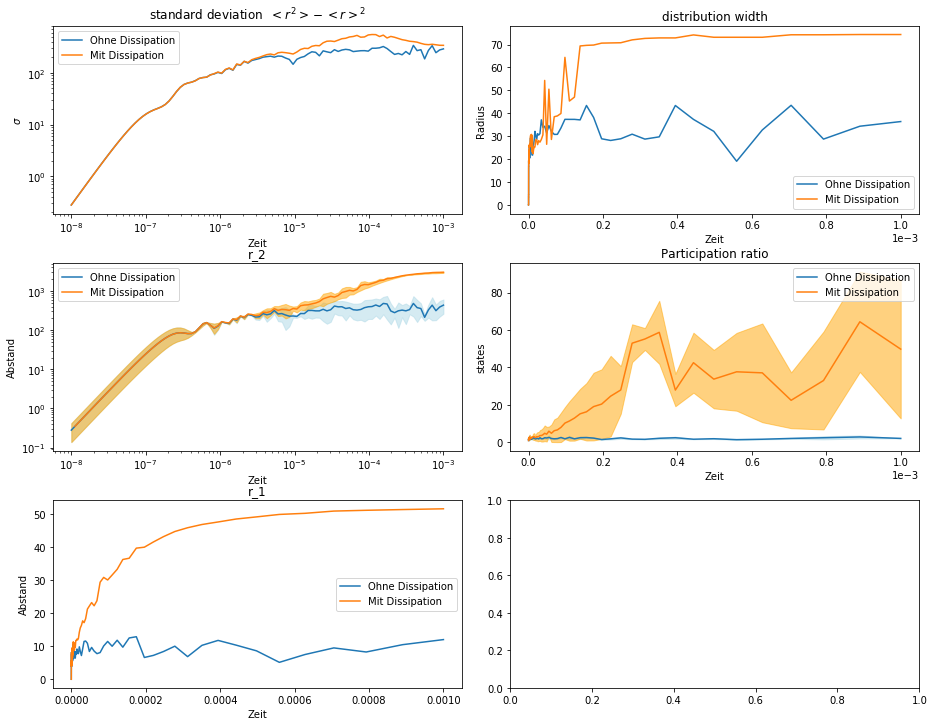

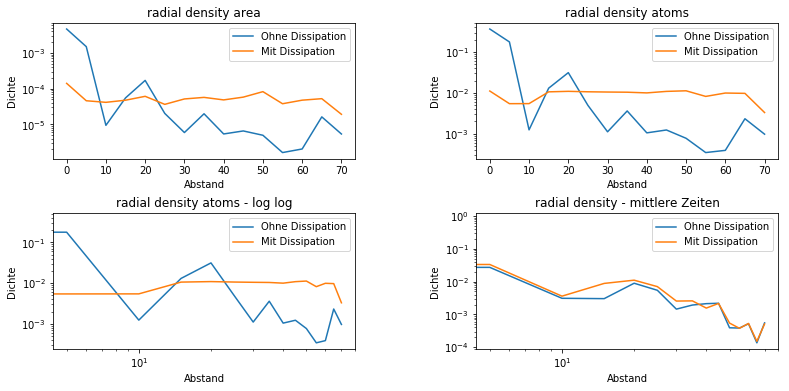

In [57]:
plot=0

d_r=2*r_b

x=np.arange(0,int(radius-d_r),d_r)

fig, axes = plt.subplots(3,2, figsize=(13,10))  # 2 rows, 2 columns
plt.tight_layout()  
plt.subplots_adjust(wspace=0.2)


#axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[0,0].set_title("standard deviation  "+ r"$<r^2>-<r>^2$")
axes[0,0].plot(times, deviation_normal[plot],label="Ohne Dissipation")
axes[0,0].plot(times, deviation_diss[plot],label="Mit Dissipation")
axes[0,0].set_yscale("log")
axes[0,0].set_xscale("log")
axes[0,0].set_xlabel("Zeit")
axes[0,0].set_ylabel(r"$\sigma$")
axes[0,0].legend();


axes[0,1].set_title("distribution width")
axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[0,1].plot(times,distribution_width_normal[plot],label="Ohne Dissipation");
axes[0,1].plot(times,distribution_width_diss[plot],label="Mit Dissipation");
axes[0,1].set_xlabel("Zeit")
axes[0,1].set_ylabel("Radius");
axes[0,1].legend();
fig.tight_layout()



axes[1,1].set_title("Participation ratio")
axes[1,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[1,1].plot(times,ipr_normal[plot],label="Ohne Dissipation");
axes[1,1].plot(times,ipr_diss[plot],label="Mit Dissipation");
axes[1,1].fill_between(times, ipr_normal[plot]-ipr_normal_S[plot], ipr_normal[plot]+ipr_normal_S[plot], color="lightblue", alpha=0.5)
axes[1,1].fill_between(times, ipr_diss[plot]-ipr_diss_S[plot], ipr_diss[plot]+ipr_diss_S[plot], color="orange", alpha=0.5)
axes[1,1].set_xlabel("Zeit")
axes[1,1].set_ylabel("states");
axes[1,1].legend();


axes[1,0].set_title("r_2")
axes[1,0].set_yscale("log")
axes[1,0].set_xscale("log")
#axes[1,0].set_ylim(1,0.5*radius**2)
#axes[1,0].plot(times,quad_func(times,0.1), label=r"$t^2$", color="black", linestyle = "--");
axes[1,0].fill_between(times, r_2_normal[plot]-r_2_normal_S[plot], r_2_normal[plot]+r_2_normal_S[plot], color="lightblue", alpha=0.5)
axes[1,0].fill_between(times, r_2_diss[plot]-r_2_diss_S[plot], r_2_diss[plot]+r_2_diss_S[plot], color="orange", alpha=0.5)
axes[1,0].plot(times,r_2_normal[plot],label="Ohne Dissipation");
axes[1,0].plot(times[1:],r_2_diss[plot][1:],label="Mit Dissipation");
axes[1,0].set_xlabel("Zeit")
axes[1,0].set_ylabel("Abstand");
axes[1,0].legend();



axes[2,0].set_title("r_1")
#axes[2,0].set_yscale("log")
#axes[2,0].set_xscale("log")
#axes[2,0].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
#axes[2,0].set_ylim(1,radius)
axes[2,0].plot(times,r_1_normal[plot],label="Ohne Dissipation");
axes[2,0].plot(times,r_1_diss[plot],label="Mit Dissipation");
axes[2,0].set_xlabel("Zeit")
axes[2,0].set_ylabel("Abstand");
axes[2,0].legend();


fig, axes = plt.subplots(2,2, figsize=(13,6))  # 2 rows, 2 columns
plt.subplots_adjust(wspace=0.4,hspace=0.4)


axes[0,0].set_title("radial density area")
axes[0,0].plot(x,n_intervall_inf_normal[plot], label="Ohne Dissipation");
axes[0,0].plot(x,n_intervall_inf_diss[plot],label="Mit Dissipation");
axes[0,0].set_xlabel("Abstand")
axes[0,0].set_ylabel("Dichte")
axes[0,0].set_yscale("log")
axes[0,0].legend();


axes[0,1].set_title("radial density atoms")
#axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[0,1].plot(x,density_inf_normal[plot],label="Ohne Dissipation");
axes[0,1].plot(x,density_inf_diss[plot],label="Mit Dissipation");
axes[0,1].set_xlabel("Abstand")
axes[0,1].set_ylabel("Dichte");
axes[0,1].set_yscale("log")
axes[0,1].legend();


axes[1,0].set_title("radial density atoms - log log")
axes[1,0].plot(x,density_inf_normal[plot],label="Ohne Dissipation");
axes[1,0].plot(x,density_inf_diss[plot],label="Mit Dissipation");
axes[1,0].set_xlabel("Abstand")
axes[1,0].set_ylabel("Dichte")
axes[1,0].set_yscale("log")
axes[1,0].set_xscale("log")
axes[1,0].legend();

axes[1,1].set_title("radial density - mittlere Zeiten")
axes[1,1].plot(x,density_normal[plot],label="Ohne Dissipation");
axes[1,1].plot(x,density_diss[plot],label="Mit Dissipation");
axes[1,1].set_xlabel("Abstand")
axes[1,1].set_ylabel("Dichte")
axes[1,1].set_yscale("log")
axes[1,1].set_xscale("log")
axes[1,1].legend();

#### Vergleich

/home/jp/.local/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


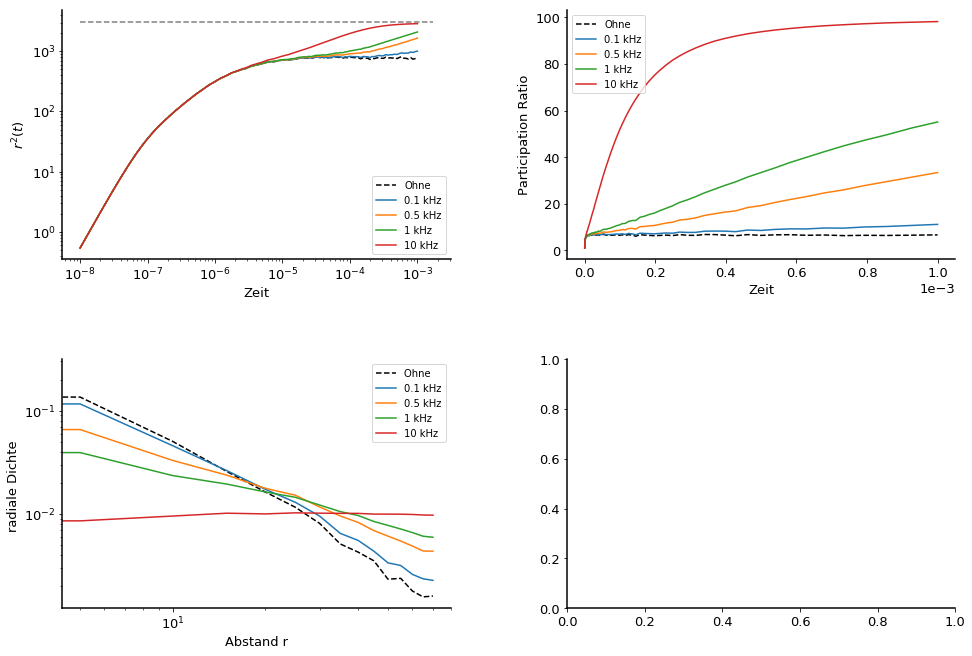

In [3]:
d_r=2*r_b

x=np.arange(0,int(radius-d_r),d_r)
fig, axes = plt.subplots(2,2, figsize=(16,11)) 
plt.subplots_adjust(wspace = 0.3, hspace=0.4)

#plt.setp(axes[plot].get_xticklabels(), visible=False)
for i in range(2):
    for j in range(2):
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].spines['top'].set_visible(False)
        for axis in ['top','bottom','left','right']:
            axes[i,j].spines[axis].set_linewidth(1.5)



#axes[0,0].fill_between(times, r_2_diss[1]-r_2_diss_S[1], r_2_diss[1]+r_2_diss_S[1], color="orange", alpha=0.5)
axes[0,0].plot(times,r_2_normal[0],label="Ohne", color="black", linestyle="--");
axes[0,0].plot(times,r_2_diss[0],label="0.1 kHz", color="C0");
#axes[0,0].plot(times,r_2_normal[1],label="Ohne", color="C1", linestyle="--");
axes[0,0].plot(times,r_2_diss[1],label="0.5 kHz", color="C1");
#axes[0,0].plot(times,r_2_normal[2],label="Ohne", color="C2", linestyle="--");
axes[0,0].plot(times,r_2_diss[2],label="1 kHz", color="C2");
#axes[0,0].plot(times,r_2_normal[3],label="Ohne", color="C3", linestyle="--");
axes[0,0].plot(times,r_2_diss[3],label="10 kHz", color="C3");

axes[0,0].plot([10**-8,1.7*10**-3],[0.5*radius**2,0.5*radius**2],linestyle ="--", color= "grey")
axes[0,0].set_xlabel("Zeit", fontsize=13)
axes[0,0].set_ylabel(r"$ r^2(t)$", fontsize=13);
axes[0,0].legend();
axes[0,0].set_yscale("log")
axes[0,0].set_xscale("log")
#def lin_func(t,a):
#    return a*t
#popt1,pcov1 = curve_fit(lin_func,times[50:80],r_2_diss[3][50:80],p0=[5*10**15])
#axes[0,0].plot(times[50:100],lin_func(times[50:100],*popt1), label=r"$t^2$", color="black", linestyle = "--", linewidth=2);
extent = axes[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('figures/Dissipation/r2.png', bbox_inches=extent.expanded(1.3, 1.32))


axes[0,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[0,1].plot(times,ipr_normal[0],label="Ohne", color="black", linestyle="--");
axes[0,1].plot(times,ipr_diss[0],label="0.1 kHz", color="C0");
#axes[0,1].plot(times,ipr_normal[1],label="Ohne", color="C1", linestyle="--");
axes[0,1].plot(times,ipr_diss[1],label="0.5 kHz", color="C1");
#axes[0,1].plot(times,ipr_normal[2],label="Ohne", color="C2", linestyle="--");
axes[0,1].plot(times,ipr_diss[2],label="1 kHz", color="C2");
#axes[0,1].plot(times,ipr_normal[3],label="Ohne", color="C3", linestyle="--");
axes[0,1].plot(times,ipr_diss[3],label="10 kHz", color="C3");
axes[0,1].set_xlabel("Zeit", fontsize=13)
axes[0,1].set_ylabel("Participation Ratio", fontsize=13);
axes[0,1].legend();
extent = axes[0,1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('figures/Dissipation/pr.png', bbox_inches=extent.expanded(1.3, 1.32))


axes[1,0].plot(x,density_inf_normal[0],label="Ohne ", color="black", linestyle="--");
axes[1,0].plot(x,density_inf_diss[0],label="0.1 kHz", color="C0");
#axes[1,0].plot(x,density_inf_normal[1],label="Ohne ", color="C1", linestyle="--");
axes[1,0].plot(x,density_inf_diss[1],label="0.5 kHz", color="C1");
#axes[1,0].plot(x,density_inf_normal[2],label="Ohne", color="C2", linestyle="--");
axes[1,0].plot(x,density_inf_diss[2],label="1 kHz", color="C2");
#axes[1,0].plot(x,density_inf_normal[3],label="Ohne", color="C3", linestyle="--");
axes[1,0].plot(x,density_inf_diss[3],label="10 kHz", color="C3");
axes[1,0].set_xlabel("Abstand r", fontsize=13)
axes[1,0].set_ylabel("radiale Dichte ", fontsize=13)
axes[1,0].set_yscale("log")
axes[1,0].set_xscale("log")
axes[1,0].legend();
extent = axes[1,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('figures/Dissipation/radiale_dens.png', bbox_inches=extent.expanded(1.3, 1.32))

In [109]:
print(4*10**7/10**12)
density=0.01
radius= (np.sqrt(number_atoms*r_b**2/density))
print(radius)
print(500/(4/3*np.pi*radius**3))

4e-05
559.0169943749474
6.832920416804901e-07
